#Simualted Yahtzee with modified rules.

##A category may be used more than once.

**1.	A dice of 5 is rolled.**

*   If a match happens on the first -> keep the match
*   If two matches happen on the first roll -> choose the dice with the highest number (i.e., higher dice numbers score higher points!)
*   If no match happens on the first roll -> choose the dice with the highest number (i.e., higher dice numbers score higher points!)
*   If a Yahtzee occurs -> end of the round

**2.	Continue the same procedure for the second round of dice.**

*   If any dice were kept from the previous round, then only the remaining dice are roll (i.e., if two 5’s are kept from round 1 then only roll 3 dice)
*   If a Yahtzee occurs -> end of round

**3.	Roll the last round of dice.**

*  If any dice were kept from the previous round, then only the remaining dice are roll (i.e., if two 5’s are kept from round 1 then only roll 3 dice)


In [1]:
#importing libraries
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
random.seed(4567) # setting seed

#rolling five random dice
def roll_dice():
  dice = []

  for i in range(5):
    dice.append(random.randint(1,6))
  print('Your first roll is: ', *dice)
  return dice

In [3]:
#Are there matches? If so, which ones do we keep? The highest valued ones!
def kept_matches(dice):
  counts = {}
  for d in dice:
    counts[d] = counts.get(d, 0) + 1

  matches = [d for d in dice if counts[d] > 1]

  multiple_matches = []
  if len(set(matches)) >= 2:
    for m in matches:
      if m == max(matches):
        multiple_matches.append(m)
    print(f"More than one match found. Kept the die with the highest value: {multiple_matches}")
    return multiple_matches

  if all(count == 1 for count in counts.values()): # if there are no matches keep the dice with the highest value
    highest_value = max(dice)
    print(f"No matches found. Kept the dice with the highest value: {highest_value}")
    return [highest_value]

  print('The dice/die you kept: ', matches)

  if counts[d] == 5:
    print(f"You lucky duck! You just got Yahtzee!")

  return matches

In [4]:
#Rolling the second dice!
random.seed(4567)
def second_roll(kept_matches):

  len_last_roll = len(kept_matches)
  second_roll = kept_matches[:]
  for i in range(5-len_last_roll): # if dice was kept in the previous round, only roll the remaining dice.
    second_roll.append(random.randint(1,6))

  counts = {}
  for dice in second_roll:
    counts[dice] = counts.get(dice, 0) + 1

  matches = [dice for dice in second_roll if counts[dice] > 1]

  multiple_matches = [] #Figuring out which matches to keep
  if len(set(matches)) >= 2:
    for m in matches:
      if m == max(matches):
        multiple_matches.append(m)
    print('Your second roll is: ', second_roll)
    print(f"More than one match found. Kept the die with the highest value: {multiple_matches}")
    return multiple_matches

  if all(count == 1 for count in counts.values()): # if there are no matches keep the dice with the highest value
    highest_value = max(second_roll)
    print('Your second roll is: ', second_roll)
    print(f"No matches found. Kept the dice with the highest value: {highest_value}")
    return [highest_value]

  print('Your second roll is: ', second_roll)
  print('The dice/die you kept: ', matches)

  if counts[dice] == 5:
    print(f"You lucky duck! You just got Yahtzee!")

  return matches

In [5]:
#Final roll
random.seed(4567)
def third_roll(previous_roll):
  len_last_roll = len(previous_roll)
  final_roll = previous_roll[:]
  for i in range(5-len_last_roll): # if dice was kept in the previous round, only roll the remaining dice.
    final_roll.append(random.randint(1,6))

  print('Your third roll is: ', final_roll)

  return final_roll

In [6]:
#counting the points earned
def points(roll):

  counts = {}
  for d in roll:
    counts[d] = counts.get(d, 0) + 1

  if len(set(roll)) == 1: #yahtzee
    tp = 50
  elif sorted(roll) == [1,2,3,4,5] or sorted(roll) == [2,3,4,5,6]: #large straight
    tp = 40
  elif 3 in counts.values() and 2 in counts.values(): # full house (more points than three of a kind )
    tp = 25
  elif 4 in counts.values(): # four of a kind
        for key, value in counts.items():
            if value == 4:
                tp = 4 * key
                break
  elif 3 in counts.values(): # three of a kind
        for key, value in counts.items():
            if value == 3:
                tp = 3 * key
                break
  else: #chance / any combination
    tp = sum(roll)

  #print('Your total points are: ', tp)
  return tp

In [10]:
#Running all of the functions and calculating the number of points, yahtzees, full house, and large straights per round.
scores = []
yahtzees = []
large_straight = []
full_house = []

for _ in range(1000):
    round_points = 0
    total_points = 0
    yahtzee_count = 0
    large_straight_count = 0
    full_house_count = 0

    print(' ')
    print('--- End of Game ---')
    print(' ')
    for _ in range(13):
        first_roll = roll_dice() # initial roll
        matched_dice = kept_matches(first_roll) # first round of dice kpet
        second_roll_result = second_roll(matched_dice) # second round of dice kept
        last_roll = third_roll(second_roll_result) # final roll
        if points(last_roll) == 50: # number of yahtzee's per round
            yahtzee_count += 1
        if points(last_roll) == 40: # number of straights per round
            large_straight_count += 1
        if points(last_roll) == 25: # number of full house per round
            full_house_count += 1
        round_points += points(last_roll)

    scores.append(round_points)
    yahtzees.append(yahtzee_count)
    large_straight.append(large_straight_count)
    full_house.append(full_house_count)

Streaming output truncated to the last 5000 lines.
The dice/die you kept:  [1, 1, 1]
Your third roll is:  [1, 1, 1, 5, 1]
Your first roll is:  6 1 3 2 1
The dice/die you kept:  [1, 1]
Your second roll is:  [1, 1, 3, 5, 1]
The dice/die you kept:  [1, 1, 1]
Your third roll is:  [1, 1, 1, 5, 2]
Your first roll is:  1 6 3 2 1
The dice/die you kept:  [1, 1]
Your second roll is:  [1, 1, 4, 2, 6]
The dice/die you kept:  [1, 1]
Your third roll is:  [1, 1, 3, 2, 1]
Your first roll is:  4 5 6 1 1
The dice/die you kept:  [1, 1]
Your second roll is:  [1, 1, 3, 5, 3]
More than one match found. Kept the die with the highest value: [3, 3]
Your third roll is:  [3, 3, 1, 3, 3]
Your first roll is:  6 3 6 6 3
More than one match found. Kept the die with the highest value: [6, 6, 6]
Your second roll is:  [6, 6, 6, 5, 3]
The dice/die you kept:  [6, 6, 6]
Your third roll is:  [6, 6, 6, 6, 4]
 
--- End of Game ---
 
Your first roll is:  4 4 3 1 5
The dice/die you kept:  [4, 4]
Your second roll is:  [4, 4, 2,

Average Number of Yahtzees: 0.526
Min Yahtzees: 0
Max Yahtzees: 4
Median Yahtzess: 0.0


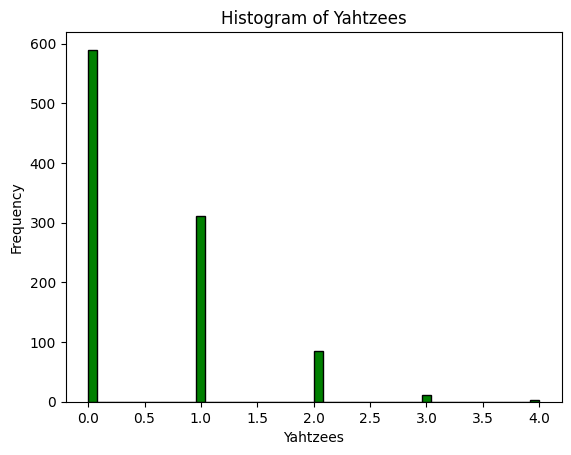

Average Score: 232.023
Min Score: 158
Max Score: 356
Median Score: 230.0


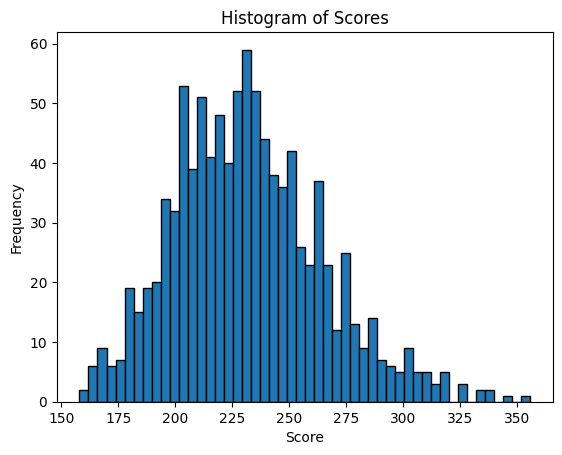

Average Number of Full House: 1.347
Min Full House: 0
Max Full House: 6
Median Full House: 1.0


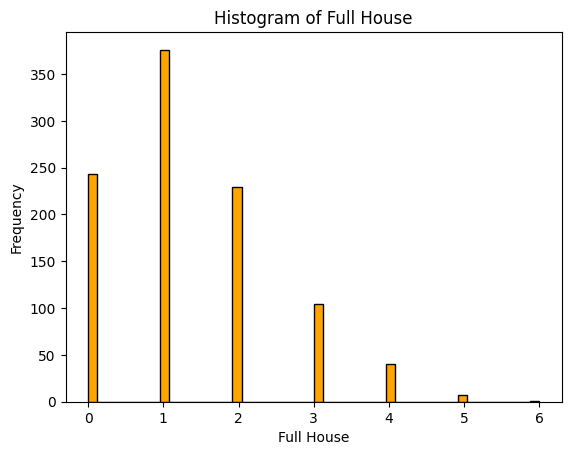

Average Number of Straights: 0.003
Min Straights: 0
Max Straights: 1
Median Straights: 0.0


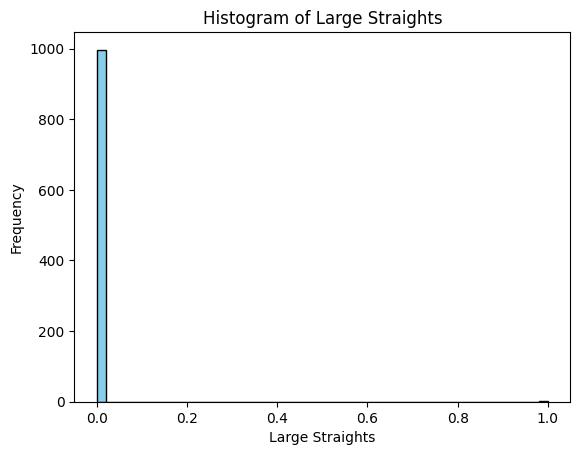

In [11]:
#Statistics and plots!

min_full = min(full_house)
max_full = max(full_house)
median_full = np.median(full_house)
average_full = np.mean(full_house)

min_str = min(large_straight)
max_str = max(large_straight)
median_str = np.median(large_straight)
average_str = np.mean(large_straight)

min_yah = min(yahtzees)
max_yah = max(yahtzees)
median_yah = np.median(yahtzees)
average_yah = (np.mean(yahtzees))

min_score = min(scores)
max_score = max(scores)
median_score = np.median(scores)
average_score = np.mean(scores)

print('Average Number of Yahtzees:', average_yah)
print("Min Yahtzees:", min_yah)
print("Max Yahtzees:", max_yah)
print("Median Yahtzess:", median_yah)

plt.hist(yahtzees, bins=50, edgecolor = 'black', color = "green")
plt.title('Histogram of Yahtzees')
plt.xlabel('Yahtzees')
plt.ylabel('Frequency')
plt.show()

print("Average Score:", average_score)
print("Min Score:", min_score)
print("Max Score:", max_score)
print("Median Score:", median_score)

plt.hist(scores, bins=50, edgecolor='black')
plt.title('Histogram of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

print('Average Number of Full House:', average_full)
print("Min Full House:", min_full)
print("Max Full House:", max_full)
print("Median Full House:", median_full)

plt.hist(full_house, bins=50, edgecolor = 'black', color = "orange")
plt.title('Histogram of Full House')
plt.xlabel('Full House')
plt.ylabel('Frequency')
plt.show()

print('Average Number of Straights:', average_str)
print("Min Straights:", min_str)
print("Max Straights:", max_str)
print("Median Straights:", median_str)

plt.hist(large_straight, bins=50, edgecolor = 'black', color = "skyblue")
plt.title('Histogram of Large Straights')
plt.xlabel('Large Straights')
plt.ylabel('Frequency')
plt.show()
